In [1]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crimes = read_csv('../data/Chicago_Crimes_2001_to_2004.csv', index_col='Date', error_bad_lines=False)
crimes = crimes.append(read_csv('../data/Chicago_Crimes_2005_to_2007.csv', index_col='Date', error_bad_lines=False))
crimes = crimes.append(read_csv('../data/Chicago_Crimes_2008_to_2011.csv', index_col='Date', error_bad_lines=False))
crimes = crimes.append(read_csv('../data/Chicago_Crimes_2012_to_2017.csv', index_col='Date', error_bad_lines=False))

Skipping line 1513591: expected 23 fields, saw 24

/home/goku/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Skipping line 533719: expected 23 fields, saw 24

Skipping line 1149094: expected 23 fields, saw 41



In [3]:
crimes = crimes.iloc[:, 3: ]

In [4]:
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
crimes.index = pd.to_datetime(crimes.index)

In [6]:
crimes.sort_index(inplace=True)

In [7]:
crimes.shape

(7941282, 19)

In [8]:
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
2001-01-01,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,NaN,NaN,2001.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2001-01-01,012XX S DAMEN AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,OTHER,False,False,1233,12.0,2.0,28.0,17,NaN,NaN,2001.0,04/09/2016 03:47:49 PM,NaN,NaN,NaN
2001-01-01,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,NaN,NaN,2001.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2001-01-01,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,NaN,NaN,2001.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
2001-01-01,031XX W DOUGLAS BLVD,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,29.0,17,NaN,NaN,2001.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN


In [9]:
types = crimes[['Primary Type']]
types.head()

,Primary Type
Date,
2001-01-01,SEX OFFENSE
2001-01-01,OFFENSE INVOLVING CHILDREN
2001-01-01,SEX OFFENSE
2001-01-01,SEX OFFENSE
2001-01-01,SEX OFFENSE


In [10]:
crime_count = pd.DataFrame(types.groupby('Primary Type').size().sort_values(ascending=False).rename('count').reset_index())
crime_count.head()

,Primary Type,count
0,THEFT,1640506
1,BATTERY,1442716
2,CRIMINAL DAMAGE,923000
3,NARCOTICS,885431
4,OTHER OFFENSE,491922


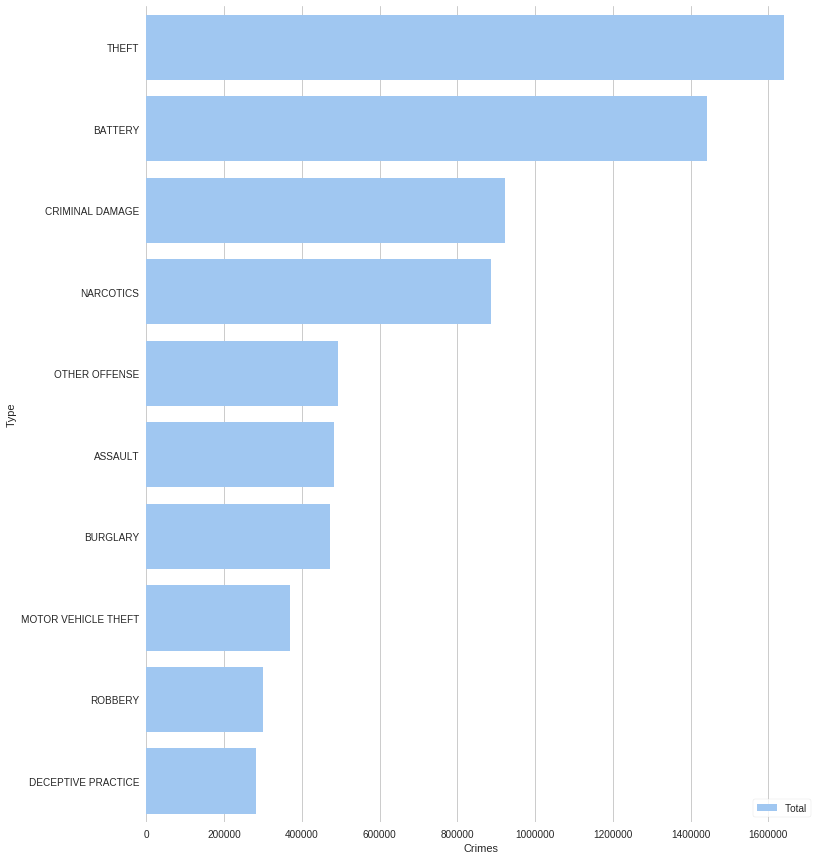

In [11]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12,15))
sns.set_color_codes("pastel")
sns.barplot(x="count", y="Primary Type", data = crime_count.iloc[:10, :], label="Total", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type", xlabel="Crimes")
sns.despine(left=True, bottom=True)
plt.show()

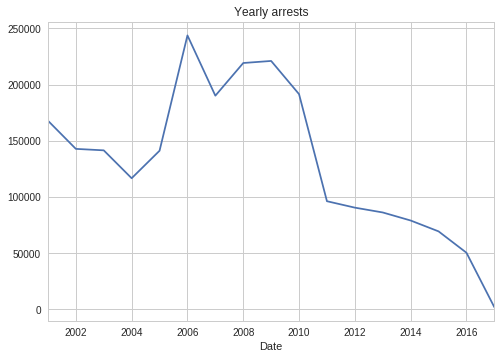

In [12]:
arrest_yearly = crimes[crimes['Arrest'] == True]['Arrest']
plt.subplot()
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

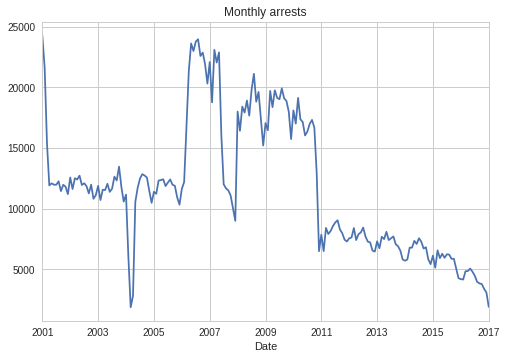

In [13]:
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

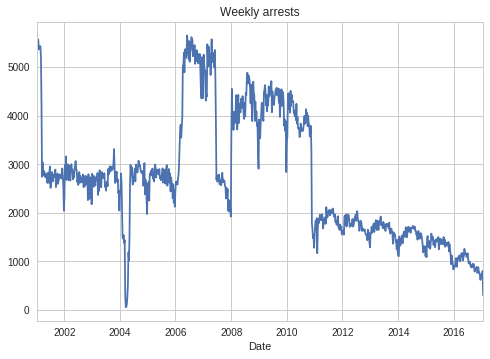

In [14]:
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

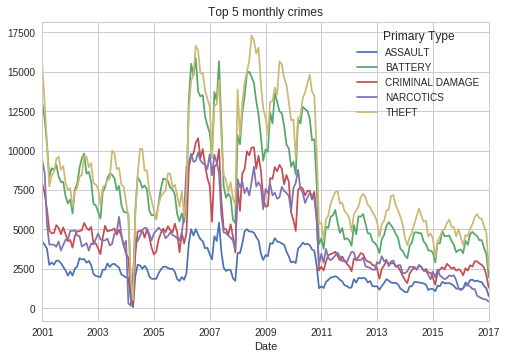

In [15]:
top_crimes = pd.DataFrame(crimes[crimes['Primary Type'].isin(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
grouper = top_crimes.groupby([pd.TimeGrouper('M'), 'Primary Type'])
data_top_crimes = grouper['Primary Type'].count().unstack()
data_top_crimes.plot()
plt.title("Top 5 monthly crimes")
plt.show()

In [16]:
import gmplot
import math

In [17]:
crimes = crimes.loc[(crimes['Primary Type'] == 'HOMICIDE') & (crimes['Latitude'] != '0') & (crimes['Latitude'] != 0)]
latitudes = [float(i) for i in crimes['Latitude'].tolist()]
latitudes = [x for x in latitudes if x > 0 or x < 0]
longitudes = [float(i) for i in crimes['Longitude'].tolist()]
longitudes = [x for x in longitudes if x > 0 or x < 0]

In [18]:
for i in range(2001, 2017) :
    year_homicides = crimes.loc[(crimes['Year'] == i)]
    print(len(year_homicides))
    lats = [float(x) for x in year_homicides['Latitude'].tolist()]
    lats = [x for x in lats if x > 0 or x < 0]
    longs = [float(x) for x in year_homicides['Longitude'].tolist()]
    longs = [x for x in longs if x > 0 or x < 0]
    gmap = gmplot.GoogleMapPlotter(41.8339037, -87.8722363, 11)
    gmap.heatmap(lats, longs)
    gmap.draw("../heatmaps/heatmap" + str(i) + ".html")

1334
780
604
454
453
481
448
513
460
438
437
503
422
424
497
772


In [19]:
gmap = gmplot.GoogleMapPlotter(41.8339037, -87.8722363, 11)
gmap.heatmap(latitudes, longitudes)
gmap.draw("../heatmaps/heatmap2001-2017.html")